In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from skopt.plots import plot_convergence
from skopt import forest_minimize
import Model_Evaluation as me

In [35]:
data = pd.read_csv('/Users/rahulnair/Desktop/Labelmaster_/src/Data_Prep/exog_daily_values.csv')
data.drop(['Unnamed: 0', 'Date'], axis=1, inplace=True)
data

,Sum of Sales,Year_Month,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,...,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x"
0,14056.71,2008-01,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,...,32.300000,-99.366667,38536.466667,0.111400,18567.033333,1565.633333,34524.719667,14284.375667,3010.753000,2341.000000
1,5997.04,2008-01,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,...,32.300000,-99.366667,38536.466667,0.111400,18567.033333,1565.633333,34524.719667,14284.375667,3010.753000,2341.000000
2,10040.78,2008-01,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,...,32.300000,-99.366667,38536.466667,0.111400,18567.033333,1565.633333,34524.719667,14284.375667,3010.753000,2341.000000
3,10788.22,2008-01,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,...,32.300000,-99.366667,38536.466667,0.111400,18567.033333,1565.633333,34524.719667,14284.375667,3010.753000,2341.000000
4,15470.33,2008-01,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,...,32.300000,-99.366667,38536.466667,0.111400,18567.033333,1565.633333,34524.719667,14284.375667,3010.753000,2341.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,26370.91,2020-11,2107.900913,3.180162,148.572035,217.631439,86.332178,4.623542,3.586395,3.975734,...,53.366667,-537.386667,52196.400000,0.270366,18477.466667,1921.633333,37856.193564,12197.536566,4354.241329,3426.865531
3314,18172.04,2020-11,2107.900913,3.180162,148.572035,217.631439,86.332178,4.623542,3.586395,3.975734,...,53.366667,-537.386667,52196.400000,0.270366,18477.466667,1921.633333,37856.193564,12197.536566,4354.241329,3426.865531
3315,54503.33,2020-11,2107.900913,3.180162,148.572035,217.631439,86.332178,4.623542,3.586395,3.975734,...,53.366667,-537.386667,52196.400000,0.270366,18477.466667,1921.633333,37856.193564,12197.536566,4354.241329,3426.865531
3316,59634.30,2020-11,2107.900913,3.180162,148.572035,217.631439,86.332178,4.623542,3.586395,3.975734,...,53.366667,-537.386667,52196.400000,0.270366,18477.466667,1921.633333,37856.193564,12197.536566,4354.241329,3426.865531


In [36]:
data['month'] = data['Year_Month'].str.split('-', expand=True)[1]
data.drop(['Year_Month'], axis=1, inplace=True)

In [37]:
data

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,...,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x",month
0,14056.71,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,3.333197,...,-99.366667,38536.466667,0.111400,18567.033333,1565.633333,34524.719667,14284.375667,3010.753000,2341.000000,01
1,5997.04,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,3.333197,...,-99.366667,38536.466667,0.111400,18567.033333,1565.633333,34524.719667,14284.375667,3010.753000,2341.000000,01
2,10040.78,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,3.333197,...,-99.366667,38536.466667,0.111400,18567.033333,1565.633333,34524.719667,14284.375667,3010.753000,2341.000000,01
3,10788.22,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,3.333197,...,-99.366667,38536.466667,0.111400,18567.033333,1565.633333,34524.719667,14284.375667,3010.753000,2341.000000,01
4,15470.33,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,3.333197,...,-99.366667,38536.466667,0.111400,18567.033333,1565.633333,34524.719667,14284.375667,3010.753000,2341.000000,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,26370.91,2107.900913,3.180162,148.572035,217.631439,86.332178,4.623542,3.586395,3.975734,3.869837,...,-537.386667,52196.400000,0.270366,18477.466667,1921.633333,37856.193564,12197.536566,4354.241329,3426.865531,11
3314,18172.04,2107.900913,3.180162,148.572035,217.631439,86.332178,4.623542,3.586395,3.975734,3.869837,...,-537.386667,52196.400000,0.270366,18477.466667,1921.633333,37856.193564,12197.536566,4354.241329,3426.865531,11
3315,54503.33,2107.900913,3.180162,148.572035,217.631439,86.332178,4.623542,3.586395,3.975734,3.869837,...,-537.386667,52196.400000,0.270366,18477.466667,1921.633333,37856.193564,12197.536566,4354.241329,3426.865531,11
3316,59634.30,2107.900913,3.180162,148.572035,217.631439,86.332178,4.623542,3.586395,3.975734,3.869837,...,-537.386667,52196.400000,0.270366,18477.466667,1921.633333,37856.193564,12197.536566,4354.241329,3426.865531,11


In [38]:
ohc = OneHotEncoder()
ohe = ohc.fit_transform(data['month'].values.reshape(-1,1)).toarray()
dfone_hot = pd.DataFrame(ohe, columns=['month_'+str(ohc.categories_[0][j]) 
                                           for j in range(len(ohc.categories_[0]))])
data = data.join(dfone_hot)

In [39]:
data

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,14056.71,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,3.333197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5997.04,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,3.333197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10040.78,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,3.333197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10788.22,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,3.333197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15470.33,1921.120299,2.943155,131.354626,230.526090,100.462289,3.231076,3.325183,3.813609,3.333197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,26370.91,2107.900913,3.180162,148.572035,217.631439,86.332178,4.623542,3.586395,3.975734,3.869837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3314,18172.04,2107.900913,3.180162,148.572035,217.631439,86.332178,4.623542,3.586395,3.975734,3.869837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3315,54503.33,2107.900913,3.180162,148.572035,217.631439,86.332178,4.623542,3.586395,3.975734,3.869837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3316,59634.30,2107.900913,3.180162,148.572035,217.631439,86.332178,4.623542,3.586395,3.975734,3.869837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
target = data['Sum of Sales']/100000
features = data.drop(['Sum of Sales'], axis=1)

In [40]:
# Standardizing the features based on unit variance
features = StandardScaler().fit_transform(features)

# split train test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=60616)

In [41]:
X_train.shape

(2322, 91)

In [42]:
X_test.shape

(996, 91)

In [43]:
def objective(params):
    # unpacking the parameters
    learning_rate, gamma, max_depth, min_child_weight, reg_lambda, reg_alpha = params
    
    model_iii = XGBRegressor(learning_rate=learning_rate, gamma=gamma, max_depth=max_depth, min_child_weight=min_child_weight, reg_lambda=reg_lambda, reg_alpha=reg_alpha)
    model_iii.fit(X_train, y_train)
    
    y_pred = model_iii.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Handle some numerical issue going on
    if np.abs(mse + 1) < 0.01 or mse < -1.0:
        return 0.0
    else:
        return mse

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.3951
Function value obtained: 0.1384
Current minimum: 0.1384
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.2221
Function value obtained: 0.1384
Current minimum: 0.1384
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.3979
Function value obtained: 0.0160
Current minimum: 0.0160
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.4854
Function value obtained: 0.1586
Current minimum: 0.0160
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.7884
Function value obtained: 0.0189
Current minimum: 0.0160
Iteration No: 6 started. Evaluating

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 1.6342
Function value obtained: 0.0160
Current minimum: 0.0156
Iteration No: 23 started. Searching for the next optimal point.
Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 1.6560
Function value obtained: 0.0160
Current minimum: 0.0156
Iteration No: 24 started. Searching for the next optimal point.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 1.1908
Function value obtained: 0.0160
Current minimum: 0.0156
Iteration No: 25 started. Searching for the next optimal point.
Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 1.3099
Function value obtained: 0.0160
Current minimum: 0.0156
Iteration No: 26 started. Searching for the next optimal point.
Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 1.3746
Function value obtained: 0.0187
Current minimum: 0.0156
Iteration No: 27 started. Searching for the next optimal point.
Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 1.3541
Function value obtained: 0.0159
Current minimum: 0.0156
Iteration No: 28 started. Searching for the next optimal point.
Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 1.2219
Function value obtained: 0.0160
Current minimum: 0.0156
Iteration No: 29 started. Sea

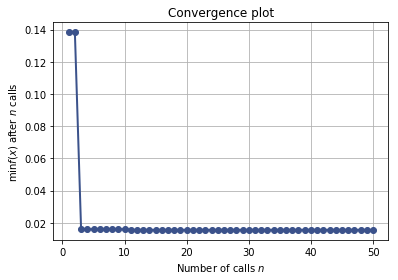

In [44]:
# Bayesian Optimization
num_thread = 20
params = ['learning_rate', 'gamma', 'max_depth', 'min_child_weight', 'reg_lambda', 'reg_alpha']

space = [(0.0001, 0.0009, 0.001, 0.009, 0.01, 0.09, 0.1, 0.9),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
         (2, 4, 6, 8, 10),
         (1,3,5,7,9),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
        ]

try:
    res_fm = forest_minimize(objective, space, n_calls=50,
                     random_state=60616,base_estimator= 'RF',acq_func='PI',
                     verbose=True, n_jobs=num_thread)
except ValueError:
    print('Forest diverged, random search intialized')
    res_fm = dummy_minimize(objective, space, n_calls=30,
         random_state=60616,
         verbose=True)

print('Minimum MSE found: {:6.5f}'.format(res_fm.fun))
print('Optimal parameters:')

for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))

plot_convergence(res_fm);

In [45]:
reg = XGBRegressor(learning_rate=0.09, gamma=0.25, max_depth=6, min_child_weight=3,
                    reg_lambda=0.75, reg_alpha=1, random_state=60616)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [46]:
# For Training data
me.evaluate_model(y_pred_train,y_train)

			Model Performance

Mean Absolute Percentage Error: inf

Mean Absolute Error: 0.07677687881508523

BIAS: -0.0004611237364030521

Mean Squared Error: 0.0004937387028369513

Root Mean Squared Error: 0.022220231835805657


/Users/rahulnair/Desktop/Labelmaster_/src/Data_Modeling/Model_Evaluation.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true))


In [47]:
# For testing data
me.evaluate_model(y_pred_test,y_test)

			Model Performance

Mean Absolute Percentage Error: inf

Mean Absolute Error: 0.07439889443860277

BIAS: -0.00693809923535771

Mean Squared Error: 0.047944672115672556

Root Mean Squared Error: 0.2189627185519776
